In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize':(11,8)})

### Working with 2D arrays

 #### Reminder: NumPy arrays
- Homogenous in type
- Calculations all at once
- Indexing with brackets: 
 - `A[index]` for 1D array
 - `A[index0, index1]` for 2D array

#### Reminder: slicing arrays
- Slicing:
 - 1D array:
 - `A[slice]`
 - 2D array:
 - `A[slice0, slice1]`
 - Slicing:
 - *slice = start:stop:stride*
 - Missing start and stop, implicitly at the beginning or end or an array respectively.
 - Missing stride, implicitly 1
 - Negative indexes/slices: count from *end* of array 

In [3]:
u = np.linspace(-2,2,3)
v = np.linspace(-1,1,5)
X,Y = np.meshgrid(u,v)
Z = X**2/25 + Y**2/4
v

array([-1. , -0.5,  0. ,  0.5,  1. ])

In [4]:
print(X,Y)

[[-2.  0.  2.]
 [-2.  0.  2.]
 [-2.  0.  2.]
 [-2.  0.  2.]
 [-2.  0.  2.]] [[-1.  -1.  -1. ]
 [-0.5 -0.5 -0.5]
 [ 0.   0.   0. ]
 [ 0.5  0.5  0.5]
 [ 1.   1.   1. ]]


#### Meshgrid
![meshgrid](meshgrid.png)

Z:
 [[0.41   0.25   0.41  ]
 [0.2225 0.0625 0.2225]
 [0.16   0.     0.16  ]
 [0.2225 0.0625 0.2225]
 [0.41   0.25   0.41  ]]


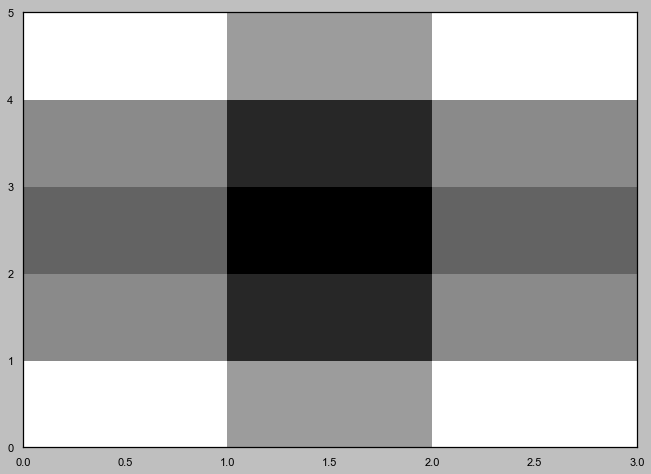

In [5]:
print('Z:\n', Z)
plt.style.use('grayscale')
plt.pcolor(Z);

Z:
 [[1 2 3]
 [4 5 6]]


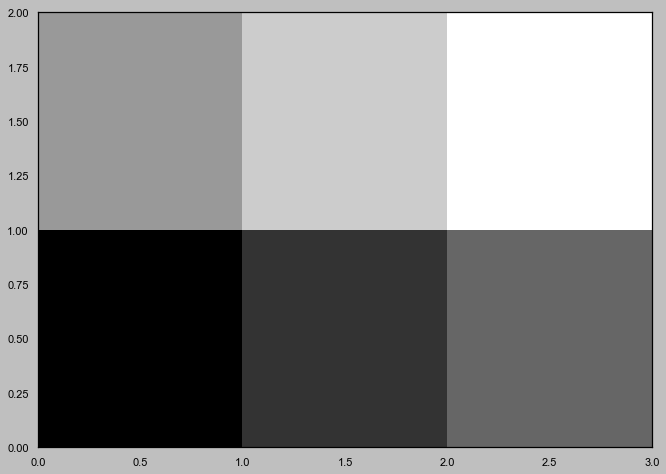

In [6]:
Z = np.array([[1,2,3],[4,5,6]])
print('Z:\n', Z)
plt.pcolor(Z);

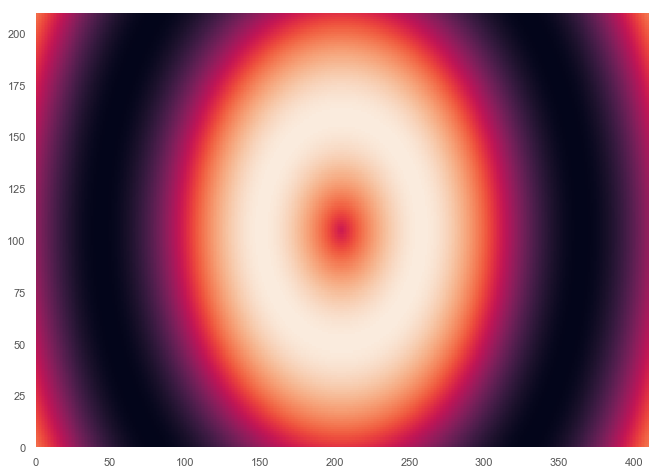

In [10]:
plt.style.use('ggplot')
# Generate two 1-D arrays: u, v
u = np.linspace(-2, 2, 410)
v = np.linspace(-1, 1, 210)

# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u,v)

# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

# Display the resulting image with pcolor()
plt.pcolor(Z)
# Save the figure to 'sine_mesh.png'
plt.savefig('sine_mesh.png')

plt.show()

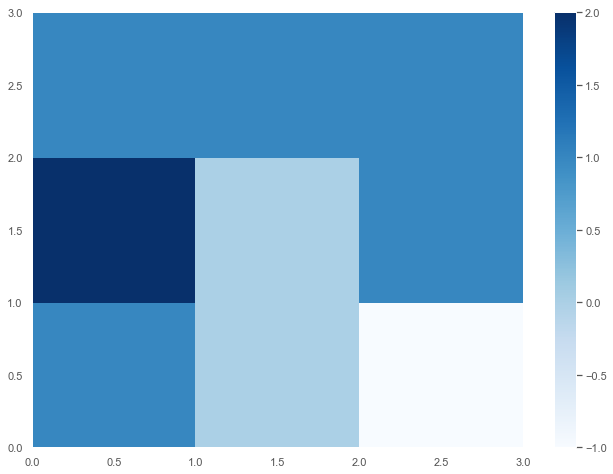

In [12]:
A = np.array([[1, 0, -1], [2, 0, 1], [1, 1, 1]])
plt.pcolor(A, cmap='Blues')
plt.colorbar()
plt.show()

### Visualizing bivariate functions

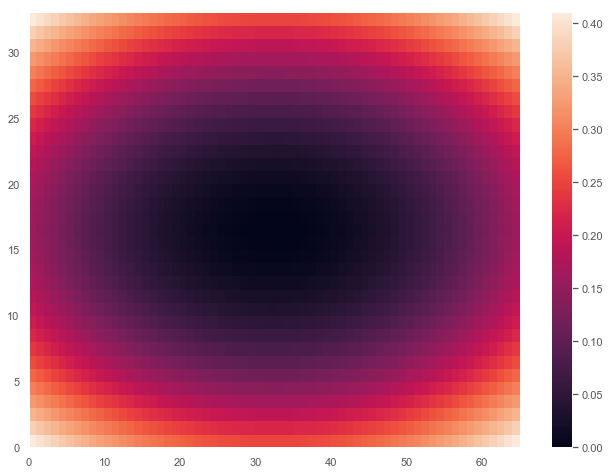

In [15]:
u = np.linspace(-2,2,65)
v = np.linspace(-1,1,33)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4
plt.pcolor(Z);
plt.colorbar();

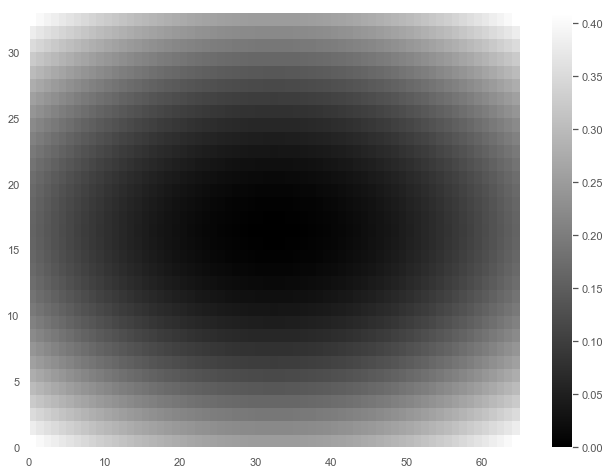

In [16]:
u = np.linspace(-2,2,65)
v = np.linspace(-1,1,33)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4
plt.pcolor(Z, cmap = 'gray');
plt.colorbar();

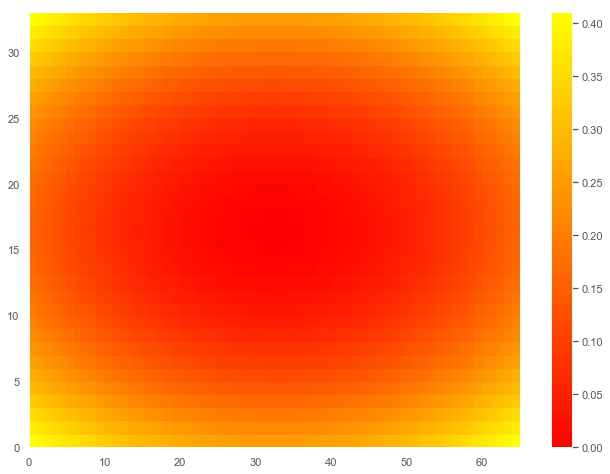

In [19]:
u = np.linspace(-2,2,65)
v = np.linspace(-1,1,33)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4
plt.pcolor(Z, cmap = 'autumn');
plt.colorbar();
plt.axis('tight');

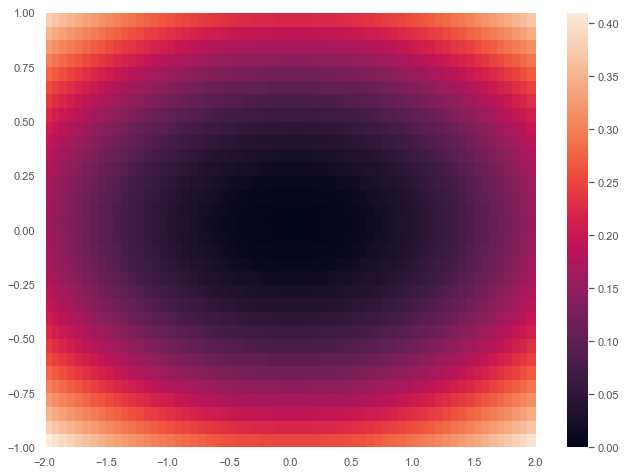

In [21]:
u = np.linspace(-2,2,65)
v = np.linspace(-1,1,33)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4
plt.pcolor(X,Y,Z);
plt.colorbar();

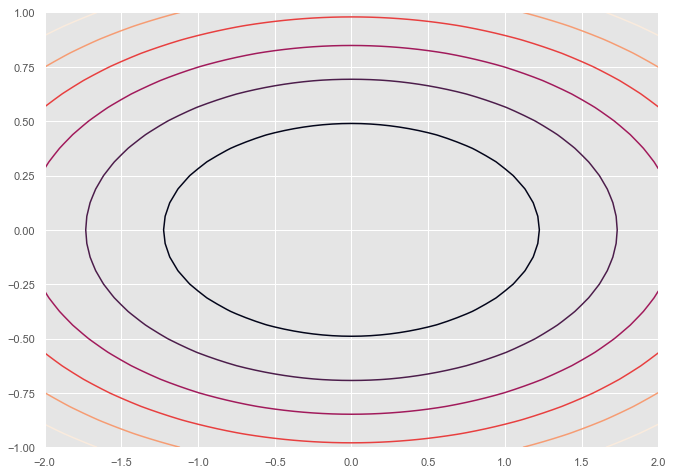

In [22]:
u = np.linspace(-2,2,65)
v = np.linspace(-1,1,33)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4
plt.contour(X,Y,Z);

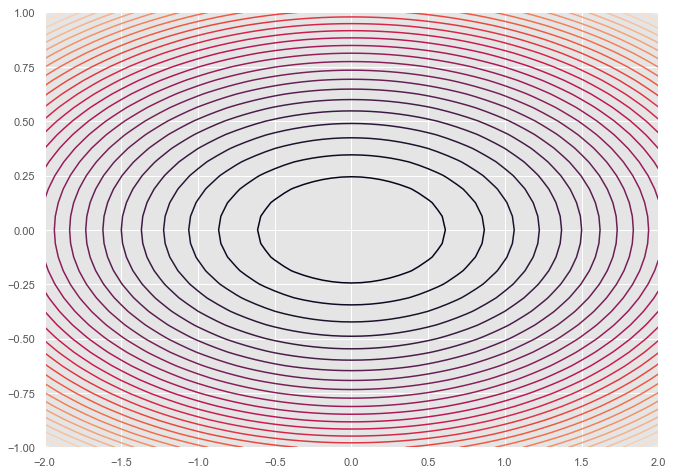

In [23]:
u = np.linspace(-2,2,65)
v = np.linspace(-1,1,33)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4
plt.contour(X,Y,Z, 30);

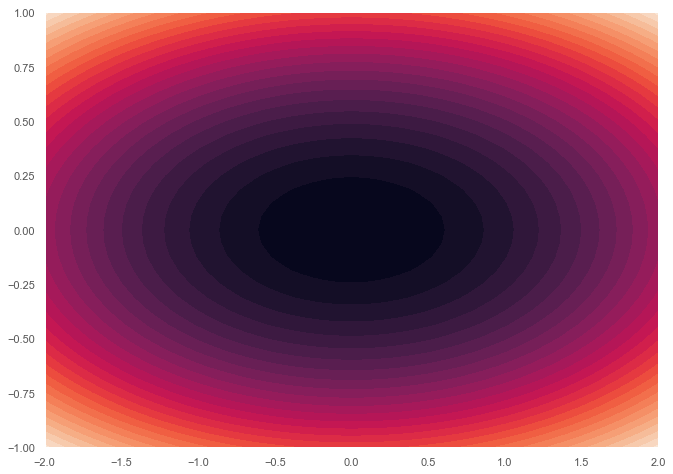

In [24]:
u = np.linspace(-2,2,65)
v = np.linspace(-1,1,33)
X,Y = np.meshgrid(u, v)
Z = X**2/25 + Y**2/4
plt.contourf(X,Y,Z, 30);

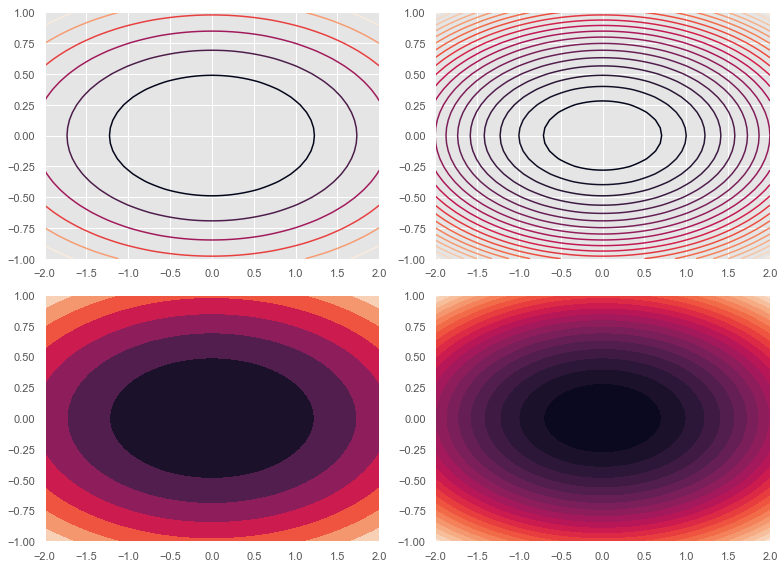

In [26]:
# Generate a default contour map of the array Z
plt.subplot(2,2,1)
plt.contour(X, Y, Z)

# Generate a contour map with 20 contours
plt.subplot(2,2,2)
plt.contour(X, Y, Z, 20)

# Generate a default filled contour map of the array Z
plt.subplot(2,2,3)
plt.contourf(X, Y, Z)

# Generate a default filled contour map with 20 contours
plt.subplot(2,2,4)
plt.contourf(X, Y, Z, 20)

# Improve the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


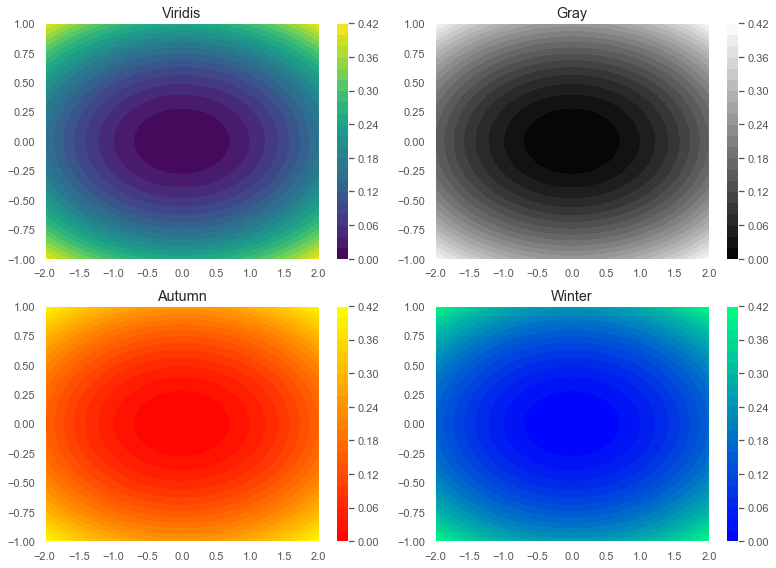

In [27]:
# Create a filled contour plot with a color map of 'viridis'
plt.subplot(2,2,1)
plt.contourf(X,Y,Z,20, cmap='viridis')
plt.colorbar()
plt.title('Viridis')

# Create a filled contour plot with a color map of 'gray'
plt.subplot(2,2,2)
plt.contourf(X,Y,Z,20, cmap='gray')
plt.colorbar()
plt.title('Gray')

# Create a filled contour plot with a color map of 'autumn'
plt.subplot(2,2,3)
plt.contourf(X,Y,Z,20, cmap='autumn')
plt.colorbar()
plt.title('Autumn')

# Create a filled contour plot with a color map of 'winter'
plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20, cmap='winter')
plt.colorbar()
plt.title('Winter')

# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()


### Visualizing bivariate distributions
- 2D points given as two 1D arrays x&y
- Goal: generate a 2D histogram from x&y

#### Histograms in 1D
- Choose bins (intervals)
- Count realizations within bins & plot

In [28]:
auto = pd.read_csv('auto-mpg.csv')
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


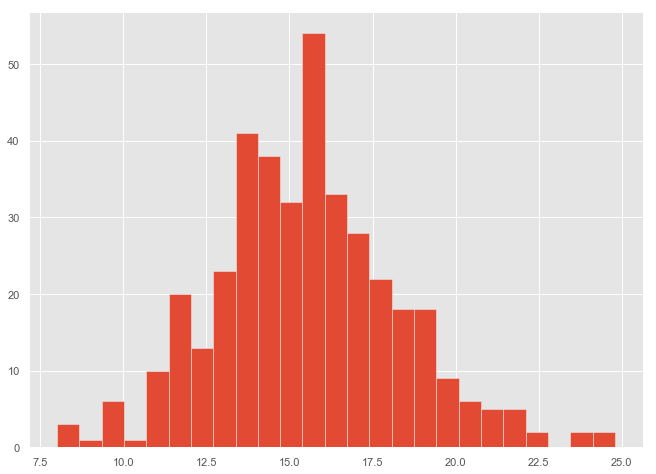

In [31]:
x = auto.weight
y = auto.accel
plt.hist(y, bins=25);

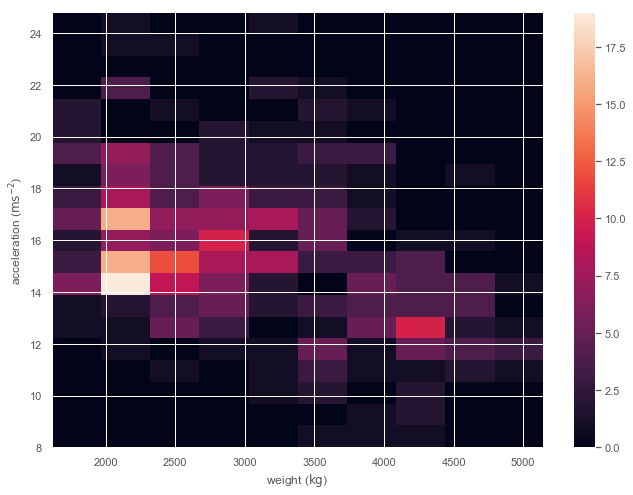

In [33]:
plt.hist2d(x,y,bins=(10,20));
plt.colorbar();
plt.xlabel('weight ($\mathrm{kg}$)');
plt.ylabel('acceleration ($\mathrm{ms}^{-2}$)');

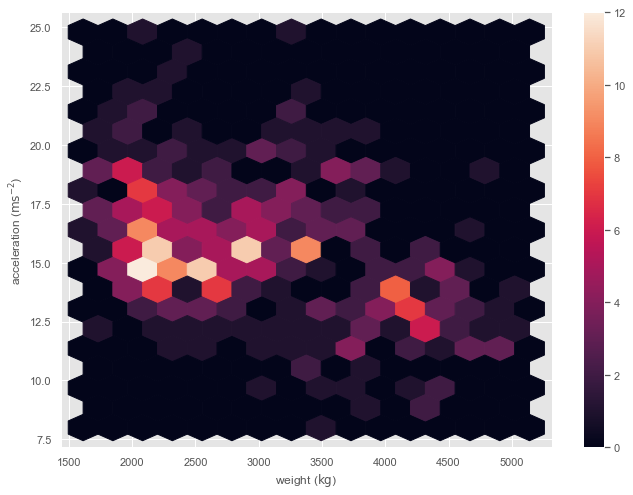

In [36]:
plt.hexbin(x,y, gridsize=(15,10));
plt.colorbar();
plt.xlabel('weight ($\mathrm{kg}$)');
plt.ylabel('acceleration ($\mathrm{ms}^{-2}$)');

In [37]:
mpg = auto.mpg
hp = auto.hp

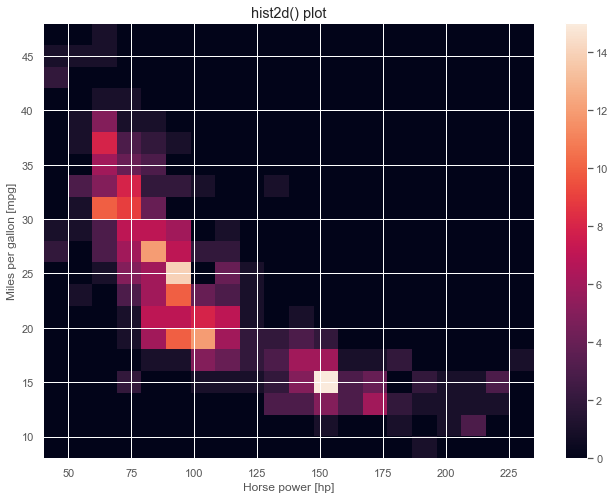

In [45]:
plt.hist2d(hp, mpg, bins=(20,20), range=((40, 235), (8, 48)))
plt.colorbar()
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')
plt.show()

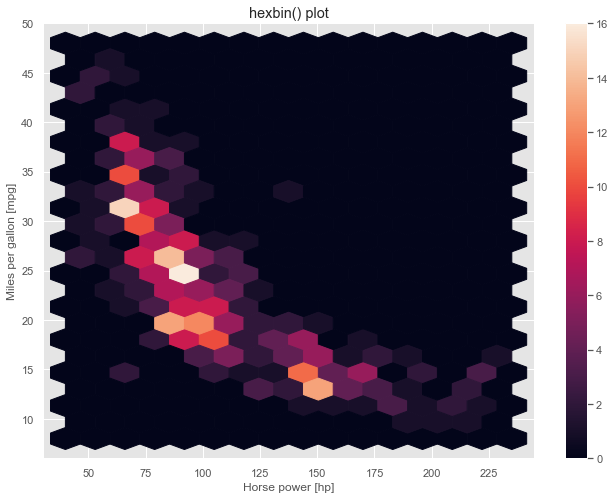

In [46]:
# Generate a 2d histogram with hexagonal bins
plt.hexbin(hp, mpg, gridsize=(15,12), extent=(40,235,8,48))

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hexbin() plot')
plt.show()


#### Working with images

#### Images
- Grayscale images: rectanglar 2D arrays
- Color images: typically three 2D arrays (channels)
 - RGB (Red-Green-Blue)
- Channel values: 
 - 0 to 1 (floating point numbers)
 - 0 to 255 (8 bit integers)

In [47]:
img = plt.imread('sunflower.jpg')
print(img.shape)

(183, 275, 3)


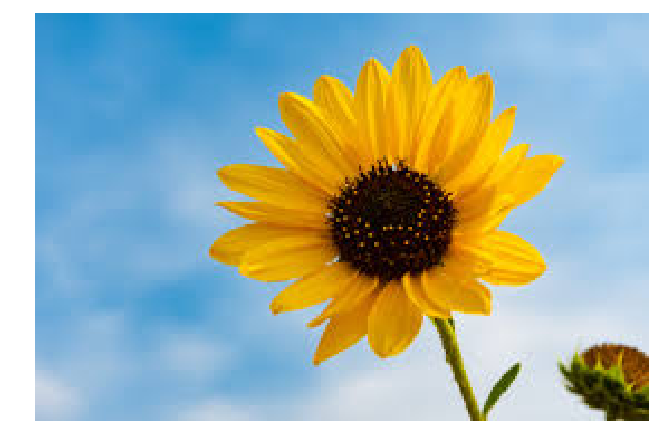

In [48]:
plt.imshow(img);
plt.axis('off');

In [49]:
collapsed = img.mean(axis=2)
print(collapsed.shape)

(183, 275)


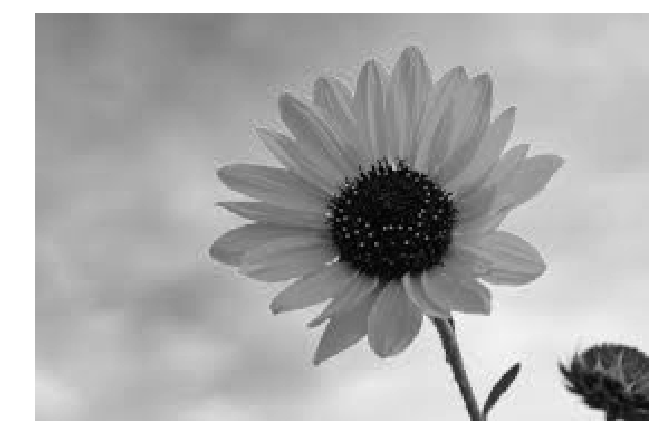

In [50]:
plt.set_cmap('gray');
plt.imshow(collapsed, cmap='gray');
plt.axis('off');

In [51]:
uneven = collapsed[::4,::2]
print(uneven.shape)

(46, 138)


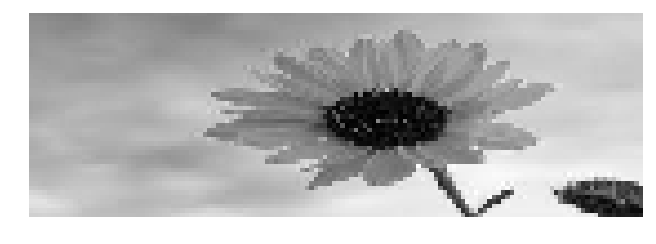

In [52]:
plt.imshow(uneven);
plt.axis('off');

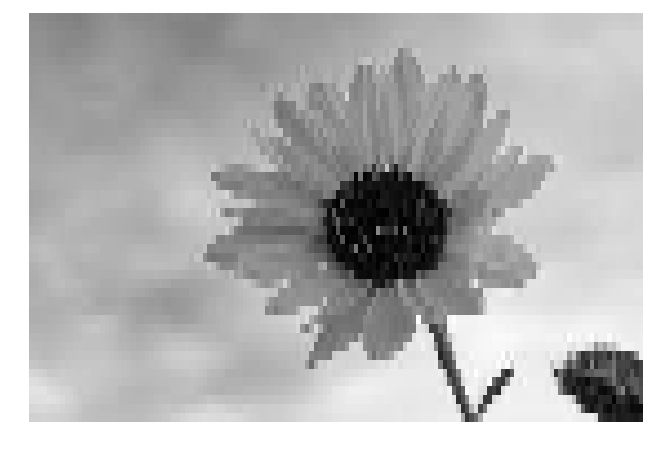

In [53]:
plt.imshow(uneven, aspect=2.0);
plt.axis('off');

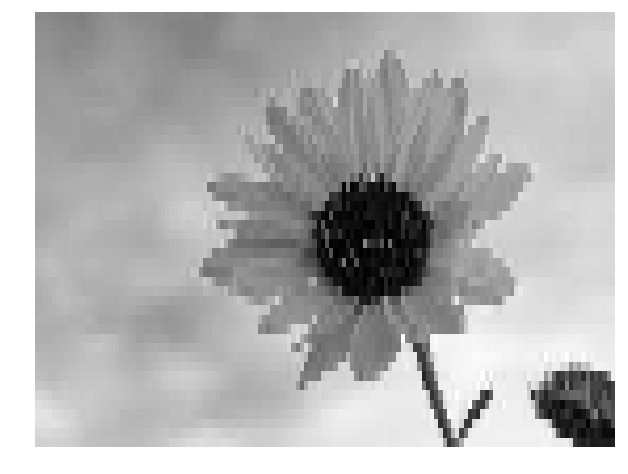

In [55]:
plt.imshow(uneven, cmap='gray', extent=(0,640,0,480));
plt.axis('off');

In [56]:
sns.set(rc={'figure.figsize':(11,8)})

(600, 600, 3)


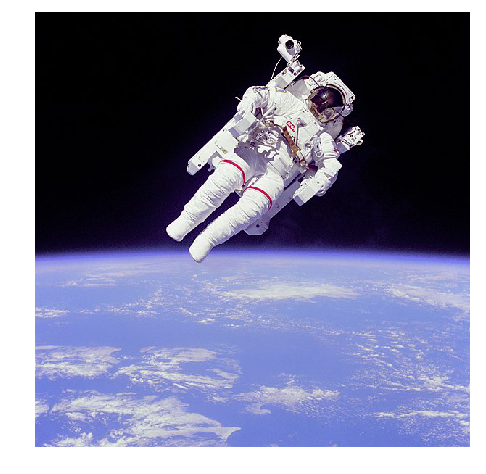

In [57]:
# Load the image into an array: img
img = plt.imread('480px-Astronaut-EVA.jpg')

# Print the shape of the image
print(img.shape)

# Display the image
plt.imshow(img);

# Hide the axes
plt.axis('off');
plt.show()

In [ ]:
intensitu = img.mean(axis=2)
print(collapsed.shape)

(600, 600, 3)
(600, 600)


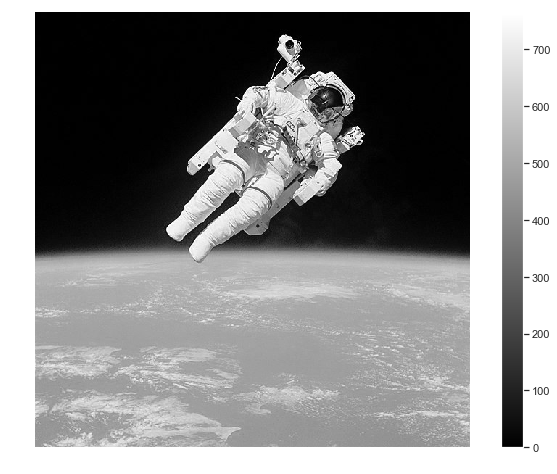

In [59]:
# Load the image into an array: img
img = plt.imread('480px-Astronaut-EVA.jpg')

# Print the shape of the image
print(img.shape)

# Compute the sum of the red, green and blue channels: intensity
intensity = img.sum(axis=2)

# Print the shape of the intensity
print(intensity.shape)

# Display the intensity with a colormap of 'gray'
plt.imshow(intensity, cmap='gray')

# Add a colorbar
plt.colorbar();

# Hide the axes and show the figure
plt.axis('off')
plt.show()


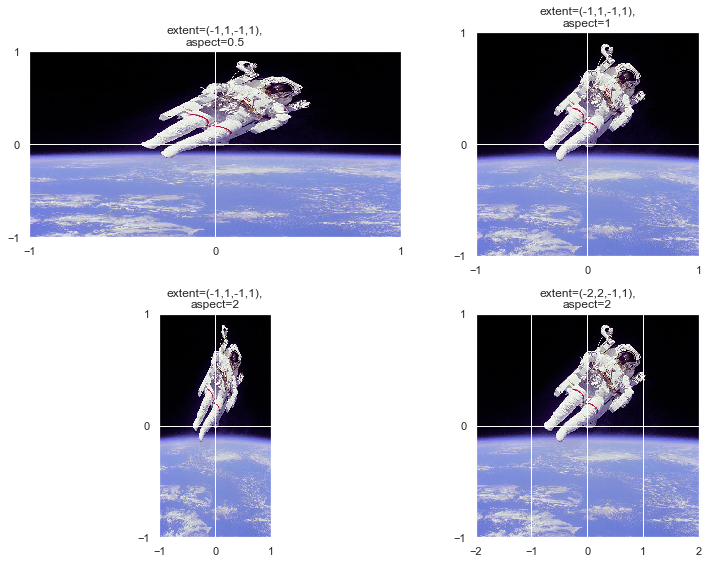

In [60]:
# Load the image into an array: img
img = plt.imread('480px-Astronaut-EVA.jpg')

# Specify the extent and aspect ratio of the top left subplot
plt.subplot(2,2,1)
plt.title('extent=(-1,1,-1,1),\naspect=0.5') 
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=0.5)

# Specify the extent and aspect ratio of the top right subplot
plt.subplot(2,2,2)
plt.title('extent=(-1,1,-1,1),\naspect=1')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=1)

# Specify the extent and aspect ratio of the bottom left subplot
plt.subplot(2,2,3)
plt.title('extent=(-1,1,-1,1),\naspect=2')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=2)

# Specify the extent and aspect ratio of the bottom right subplot
plt.subplot(2,2,4)
plt.title('extent=(-2,2,-1,1),\naspect=2')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-2,2,-1,1), aspect=2)

# Improve spacing and display the figure
plt.tight_layout()
plt.show()

The smallest & largest pixel intensities are 86 & 246.
The rescaled smallest & largest pixel intensities are 0.0 & 256.0.


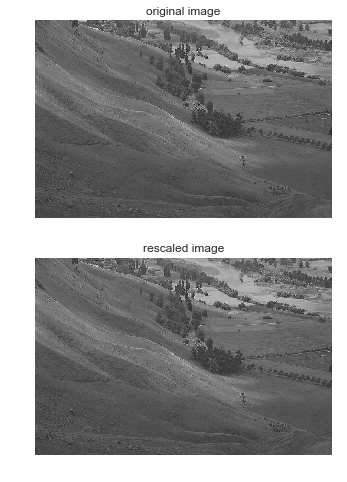

In [64]:
plt.set_cmap('gray')
# Load the image into an array: image
image = plt.imread('800px-Unequalized_Hawkes_Bay_NZ.jpg')

# Extract minimum and maximum values from the image: pmin, pmax
pmin, pmax = image.min(), image.max()
print("The smallest & largest pixel intensities are %d & %d." % (pmin, pmax))

# Rescale the pixels: rescaled_image
rescaled_image = 256*(image - pmin) / (pmax - pmin)
print("The rescaled smallest & largest pixel intensities are %.1f & %.1f." % 
      (rescaled_image.min(), rescaled_image.max()))

# Display the original image in the top subplot
plt.subplot(2,1,1)
plt.title('original image')
plt.axis('off')
plt.imshow(image)

# Display the rescaled image in the bottom subplot
plt.subplot(2,1,2)
plt.title('rescaled image')
plt.axis('off')
plt.imshow(rescaled_image)

plt.show()
